# Implementation of  K Means Clustering Algorithm with Smart Initialization  (k-means++)

In [4]:
#Author: Swapnil Acharya
#Date: 11/03/2020

In [5]:
#Import Required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import random

In [6]:
#read data from file
bm_df = pd.read_csv("buddymove.csv")

In [7]:
#view info of read file
bm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User Id    249 non-null    object
 1   Sports     249 non-null    int64 
 2   Religious  249 non-null    int64 
 3   Nature     249 non-null    int64 
 4   Theatre    249 non-null    int64 
 5   Shopping   249 non-null    int64 
 6   Picnic     249 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.7+ KB


In [8]:
#view features of read file
bm_df.columns

Index(['User Id', 'Sports', 'Religious', 'Nature', 'Theatre', 'Shopping',
       'Picnic'],
      dtype='object')

In [9]:
bm_df

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86
...,...,...,...,...,...,...,...
244,User 245,18,139,148,129,129,168
245,User 246,22,114,228,104,84,168
246,User 247,20,124,178,104,158,174
247,User 248,20,133,149,139,144,213


In [10]:
bm_df = bm_df.drop("User Id",1)
bm_df

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68
2,2,50,97,87,50,75
3,2,68,77,95,76,61
4,2,98,54,59,95,86
...,...,...,...,...,...,...
244,18,139,148,129,129,168
245,22,114,228,104,84,168
246,20,124,178,104,158,174
247,20,133,149,139,144,213


In [11]:
class Kmeans():
    """This class implements Kmeans ++ algorithms for clustering.
    
    This class implements Kmeans ++ algorithms for clustering.This
    reduces data to 2D then applies k_means ++ algorithm.
    """
    
    def __init__(self,num_clusters = 2,max_iter=500):
        """This class method initializes K means clustering algorith and is the default constructor.
        
        Args:
            num_clusters(int): A value specified the numbers of clusters for this model
        
        Returns:
            None
        """
        self.__centroids = None #centroids for fitted cluster
        self.__k = num_clusters #THe numbers of clusters
        self.__iterations = max_iter #the number of iterations
        
    def get_centroids(self):
        """This class methods returns centroids for this K means model
        
        Args:
            None
            
        Returns:
            centroids(numpy.array): Centroids for K means model
        """
        return self.__centroids
    
    
    def __get_initial_centroids(self,features_matrix):
        """This class methods initializes centroids.
        
        This class methods initializes centroids by random selecting one of the points from 
        given features matrix.
        
        Args:
            features_matrix(numpy.array): A numpy array containing examples by features  [n,m].
            k
        """
        rand_indexes = np.random.randint(features_matrix.shape[0],size=self.__k) #get random indexes
        self.__centroids = features_matrix[rand_indexes] #get centroids from data points with the randomly generated index
        self.__centroids.shape = (self.__k,features_matrix.shape[1]) #reshape centroids
        
        
    def __revise_cluster_centers(self,features_matrix,cluster_labels):
        """This class method updates the centroids.
        
        THis clas methods updates the centroids by caculating mean for given cluster labels and features_matrix.
        
        Args:
            features_matrix(numpy.array): This the trainning data point with examples X features [n,m].
            cluster_labels(numpy.array): An array with previous cluster labels, [n]
            
        Returns:
            None
        """
        for i in range(0,self.__k):
            dpoints = features_matrix[cluster_labels==i] #get datapoints for given labels
            self.__centroids[i,:] = np.mean(dpoints,axis=0) #calulate mean and update centroids
            
    
    def fit(self,features_matrix,verbose=False):
        """This class methods trains the K means model.
        
        Args:
            features_matrix(numpy.array): This the trainning data point with examples X features [n,m].
            verbose(boolean): A flag indicating whter moddel fitting process messages should be printed or not
        """
        self.__get_initial_centroids(features_matrix) #get initial centroids

        if verbose:
            print("Initial Centroids Are: ", self.__centroids)#print centroids
        
        distances = np.zeros((features_matrix.shape[0],self.__k),float)

        for i in range(0,self.__iterations): #loop for specified itertations

            for j in range(0,self.__k): #compute disances to all centroids
                distances[:,j] = np.linalg.norm((self.__centroids[j,:]-features_matrix),axis=1)
                
            cluster_labels = np.argmin(distances,axis=1) #get cluster labels
         
            self.__revise_cluster_centers(features_matrix,cluster_labels)  #revise cluster labels
            
            if verbose: #print centroids
                print(" Iteration: ",i, "Revised Centroids: \n",self.__centroids)
    
    
    def predict_labels(self,features_matrix):
        """This class methods predicts labels for given features_matrix
        
        Args:
            features_matrix(numpy.array): This the data point with examples X features [n,m] whose label is to be predicited.
        """
        distances = np.zeros((features_matrix.shape[0],self.__k),float)
        for j in range(0,self.__k): #compute disances to all centroids
            distances[:,j] = np.linalg.norm((self.__centroids[j,:]-features_matrix),axis=1)
        cluster_labels = np.argmin(distances,axis=1) #get cluster labels
        return cluster_labels

In [12]:
def visualize_k_means_clustering(features_matrix,centroids,cluster_labels,k):
    """This is a helper method that visualizes K means clusters

    Args:
        features_matrix(numpy.array): This the data point with examples X features [n,m].
        centroids(numpy.array): centroids of k means clustering
        cluster_labels(numpy.array): predicted cluster labels for given features_matrix
        k(int): the numbers of clusters
    """
    fig, ax = plt.subplots()
    for i in range(0,k):
        dpoints = features_matrix[cluster_labels==i]
        ax.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50)
        ax.scatter(centroids[i,0],centroids[i,1],marker="o",s=100) #plot points

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Clusters and Centroids")

In [13]:
model = Kmeans(num_clusters=2,max_iter=100)

In [14]:
features_matrix = bm_df.to_numpy()

In [15]:
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)

In [16]:
model.fit(features_matrix)

In [17]:
centroids = model.get_centroids()

In [18]:
cluster_labels = model.predict_labels(features_matrix)

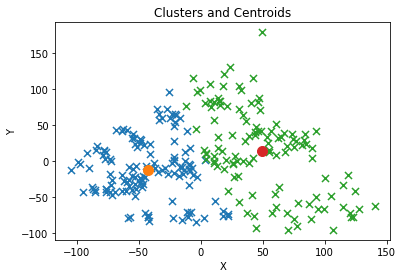

In [19]:
visualize_k_means_clustering(features_matrix,centroids,cluster_labels,k=2)

# Visualize for different clusters



After 5000 Iterations, Cluster Labels for Data: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]




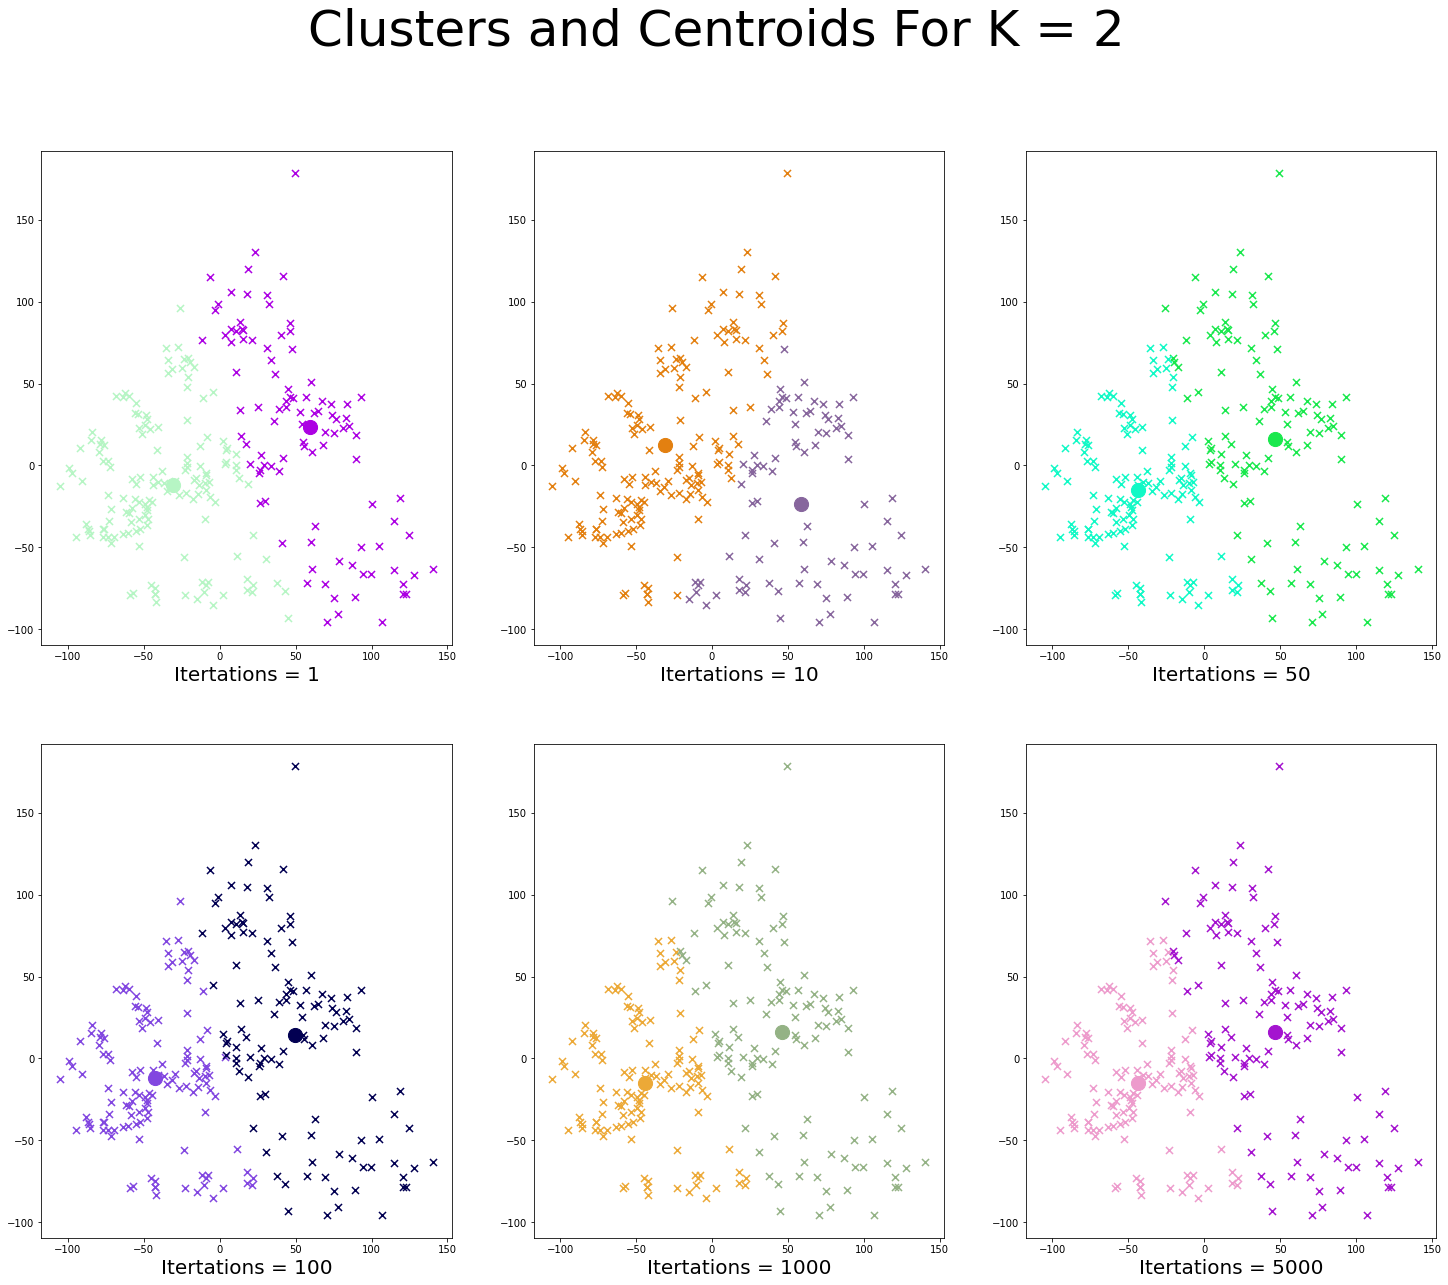

In [21]:
features_matrix = bm_df.to_numpy()
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 2
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50) 
    
print("\n")
print("After 5000 Iterations, Cluster Labels for Data: \n",cluster_labels)
print("\n")



After 5000 Iterations, Cluster Labels for Data: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 2 2 0 0 0 0 0 0 2 1 0 0 0 0 2 0 1 0 1 0 0 2 0 0 1 2 1 0 2 1 2 0 1
 2 0 0 0 0 0 0 1 0 0 2 0 2 2 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 2 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 2 0 0 2 2 2 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 0 2 0 0 0 0 2 1 0 0 2 0 0 0 0 0 0 0 0]




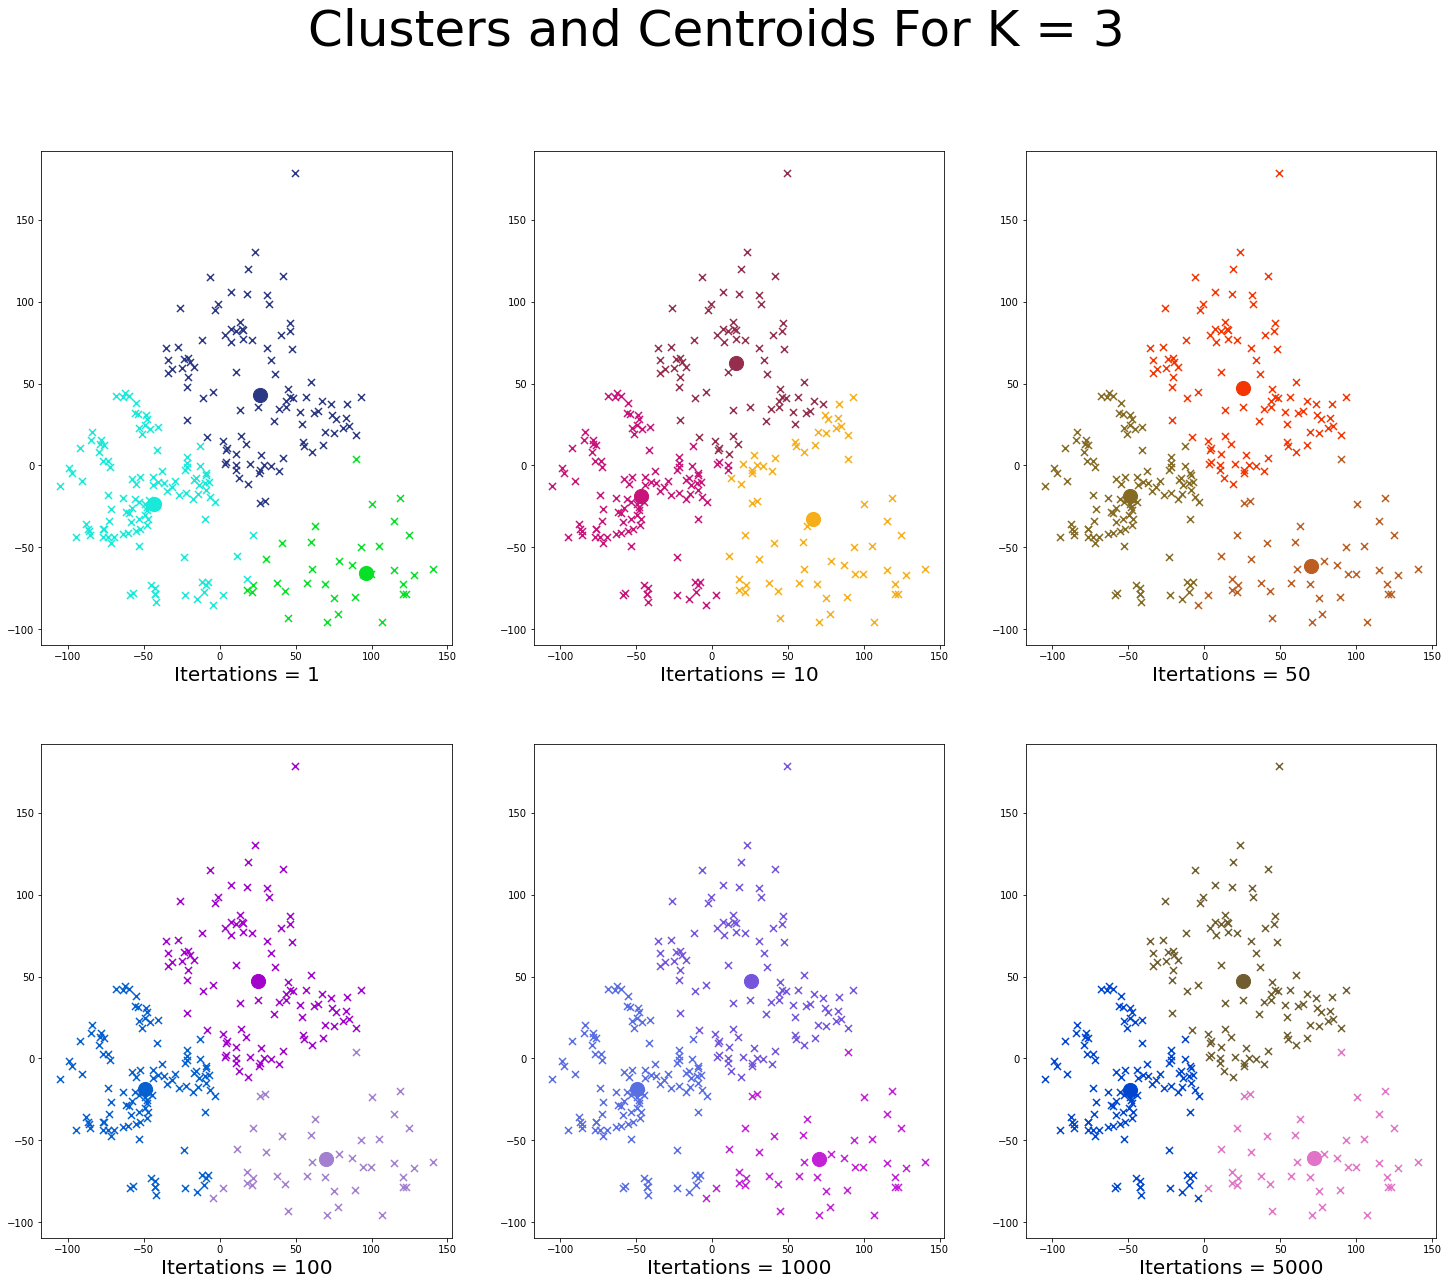

In [22]:
features_matrix = bm_df.to_numpy()
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 3
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50) 
    
print("\n")
print("After 5000 Iterations, Cluster Labels for Data: \n",cluster_labels)
print("\n")



After 5000 Iterations, Cluster Labels for Data: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 1 1
 1 2 1 2 1 3 2 1 1 1 2 2 3 0 1 1 2 0 3 1 0 2 0 2 1 3 1 1 0 1 0 1 3 0 3 2 0
 3 2 2 2 2 1 1 0 1 2 3 1 3 1 3 2 2 3 1 2 3 1 2 1 1 2 1 3 2 1 2 3 2 1 1 3 2
 3 2 2 2 1 3 1 2 2 3 2 1 1 2 3 1 1 3 2 3 1 1 2 1 3 1 2 3 3 3 2 1 3 2 2 1 1
 1 1 3 2 1 3 1 1 1 3 1 2 1 2 3 0 1 1 3 2 2 2 1 2 1 1 1]




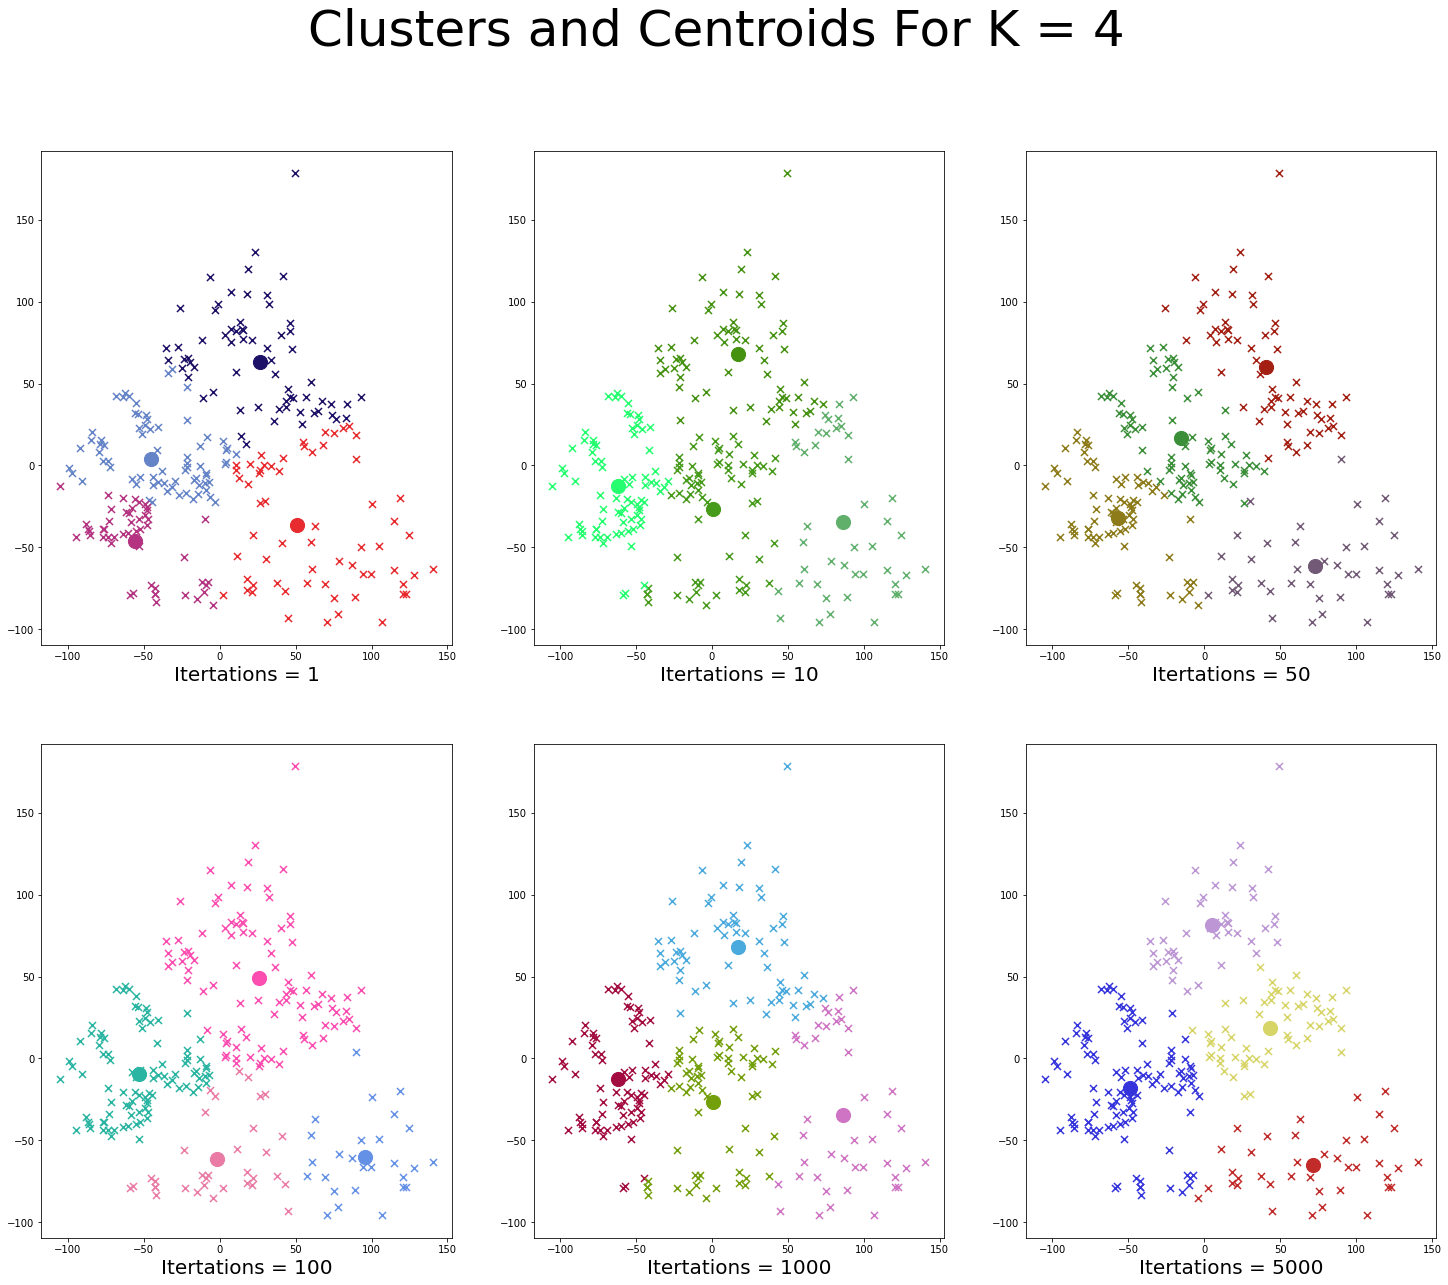

In [26]:
features_matrix = bm_df.to_numpy()
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 4
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50) 
    
print("\n")
print("After 5000 Iterations, Cluster Labels for Data: \n",cluster_labels)
print("\n")



After 5000 Iterations, Cluster Labels for Data: 
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 1 3 3 3 0 0 3 3 2 3 0 0 0 3 0 0 3 0 0 0 2 0 0 0
 0 2 0 2 3 2 0 2 2 0 3 3 0 2 0 0 2 0 3 0 3 3 2 2 0 3 2 3 0 0 3 0 2 0 2 0 0
 0 4 0 0 2 1 0 2 0 0 0 0 2 0 2 0 4 0 1 4 0 0 0 0 0 2 0 0 0 2 0 0 2 0 2 0 0
 2 0 0 0 0 0 0 0 2 0 2 2 1 1 1 0 0 1 4 4 1 4 4 4 4 4 4 1 4 4 4 1 4 4 4 1 4
 1 4 4 4 4 1 4 4 4 1 4 4 4 4 1 4 4 1 4 1 4 2 4 2 1 2 4 1 1 1 4 4 1 4 4 4 4
 4 4 1 4 4 1 4 4 4 1 4 4 4 4 1 0 4 4 1 4 4 4 4 4 4 4 4]




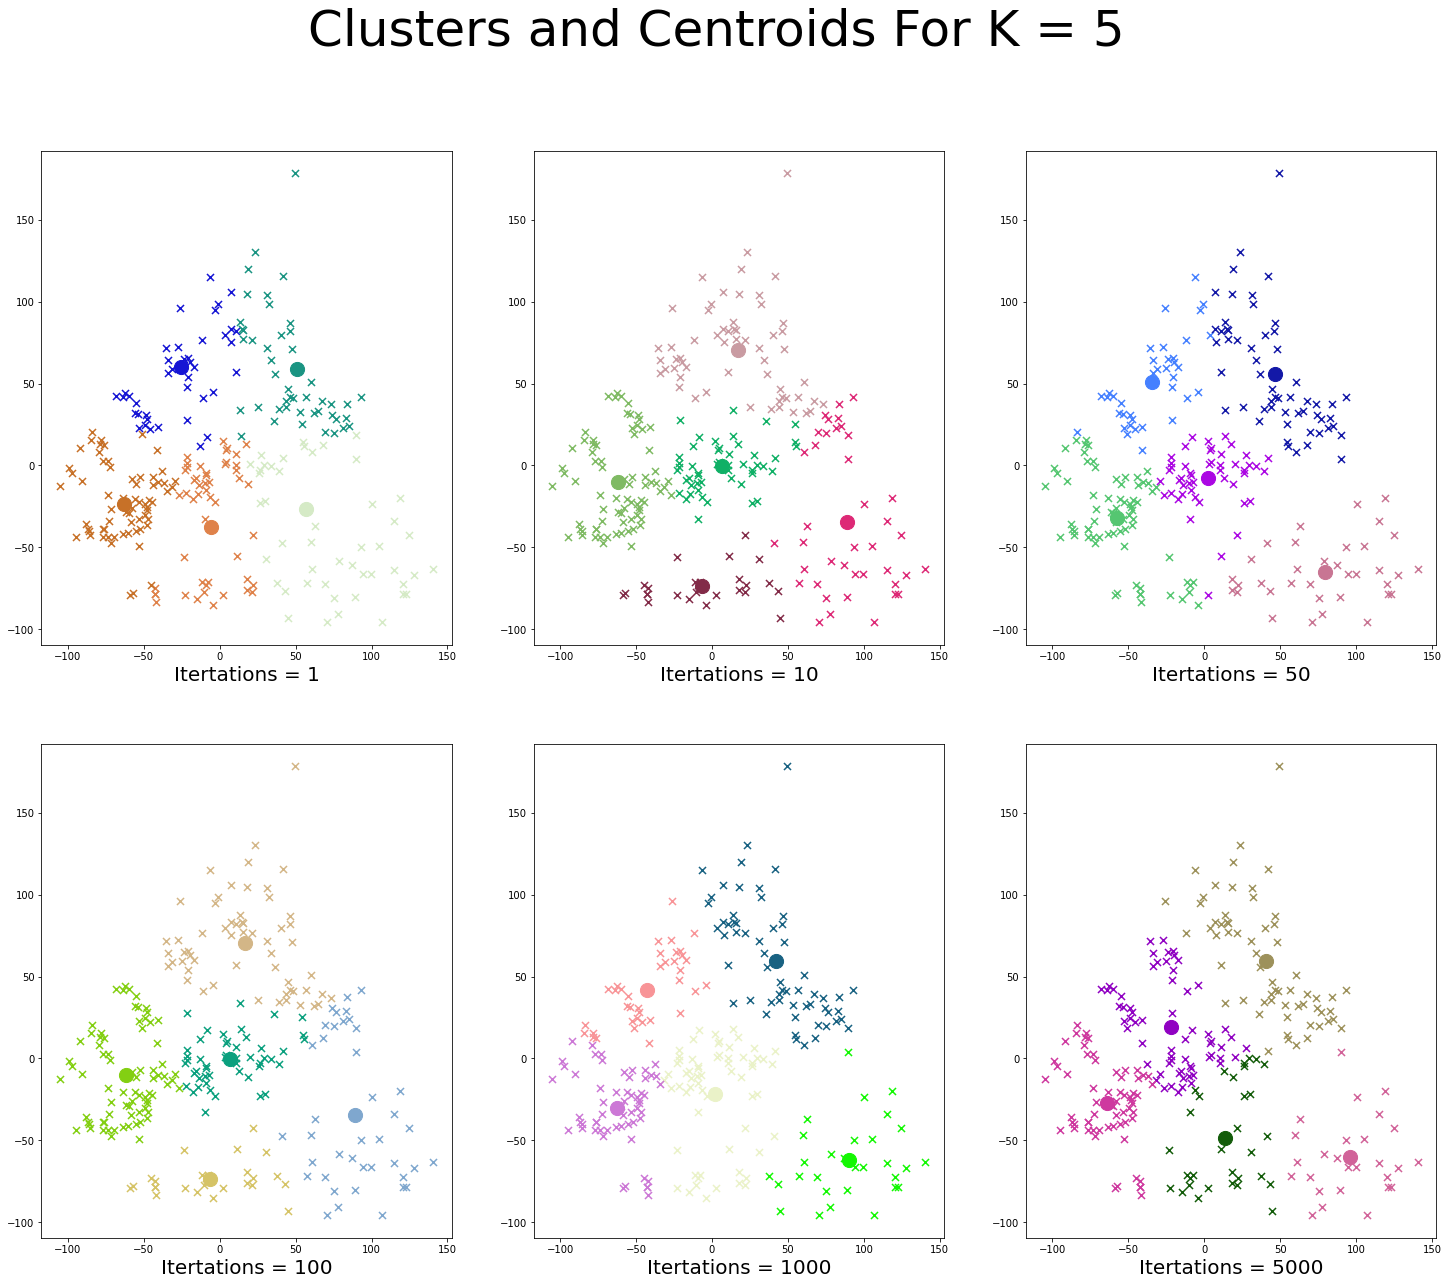

In [24]:
features_matrix = bm_df.to_numpy()
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 5
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50) 
    
print("\n")
print("After 5000 Iterations, Cluster Labels for Data: \n",cluster_labels)
print("\n")



After 5000 Iterations, Cluster Labels for Data: 
 [3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 2 3 3 5 3 3 3 1 1 3 1 2 3 1 1 1 1 1 1 3 1 1 1 2 1 1 1
 1 2 1 2 3 2 1 2 2 1 3 1 1 2 1 1 2 1 1 1 1 3 2 2 1 3 2 3 1 1 3 1 1 1 1 0 1
 1 4 0 4 2 5 4 0 1 0 1 4 2 1 0 1 4 1 5 0 1 4 1 4 1 2 0 1 1 0 1 1 2 1 2 1 1
 2 4 4 4 4 1 1 1 0 4 2 1 5 0 5 4 4 5 0 4 5 0 4 0 0 4 0 5 4 0 4 5 4 0 0 5 4
 5 4 4 4 0 5 0 4 4 5 4 0 0 4 5 0 0 5 4 5 0 1 4 0 5 0 4 5 5 5 4 0 5 4 4 0 0
 0 0 5 4 0 5 0 0 0 5 0 4 0 4 5 1 0 0 5 4 4 4 0 4 0 0 0]




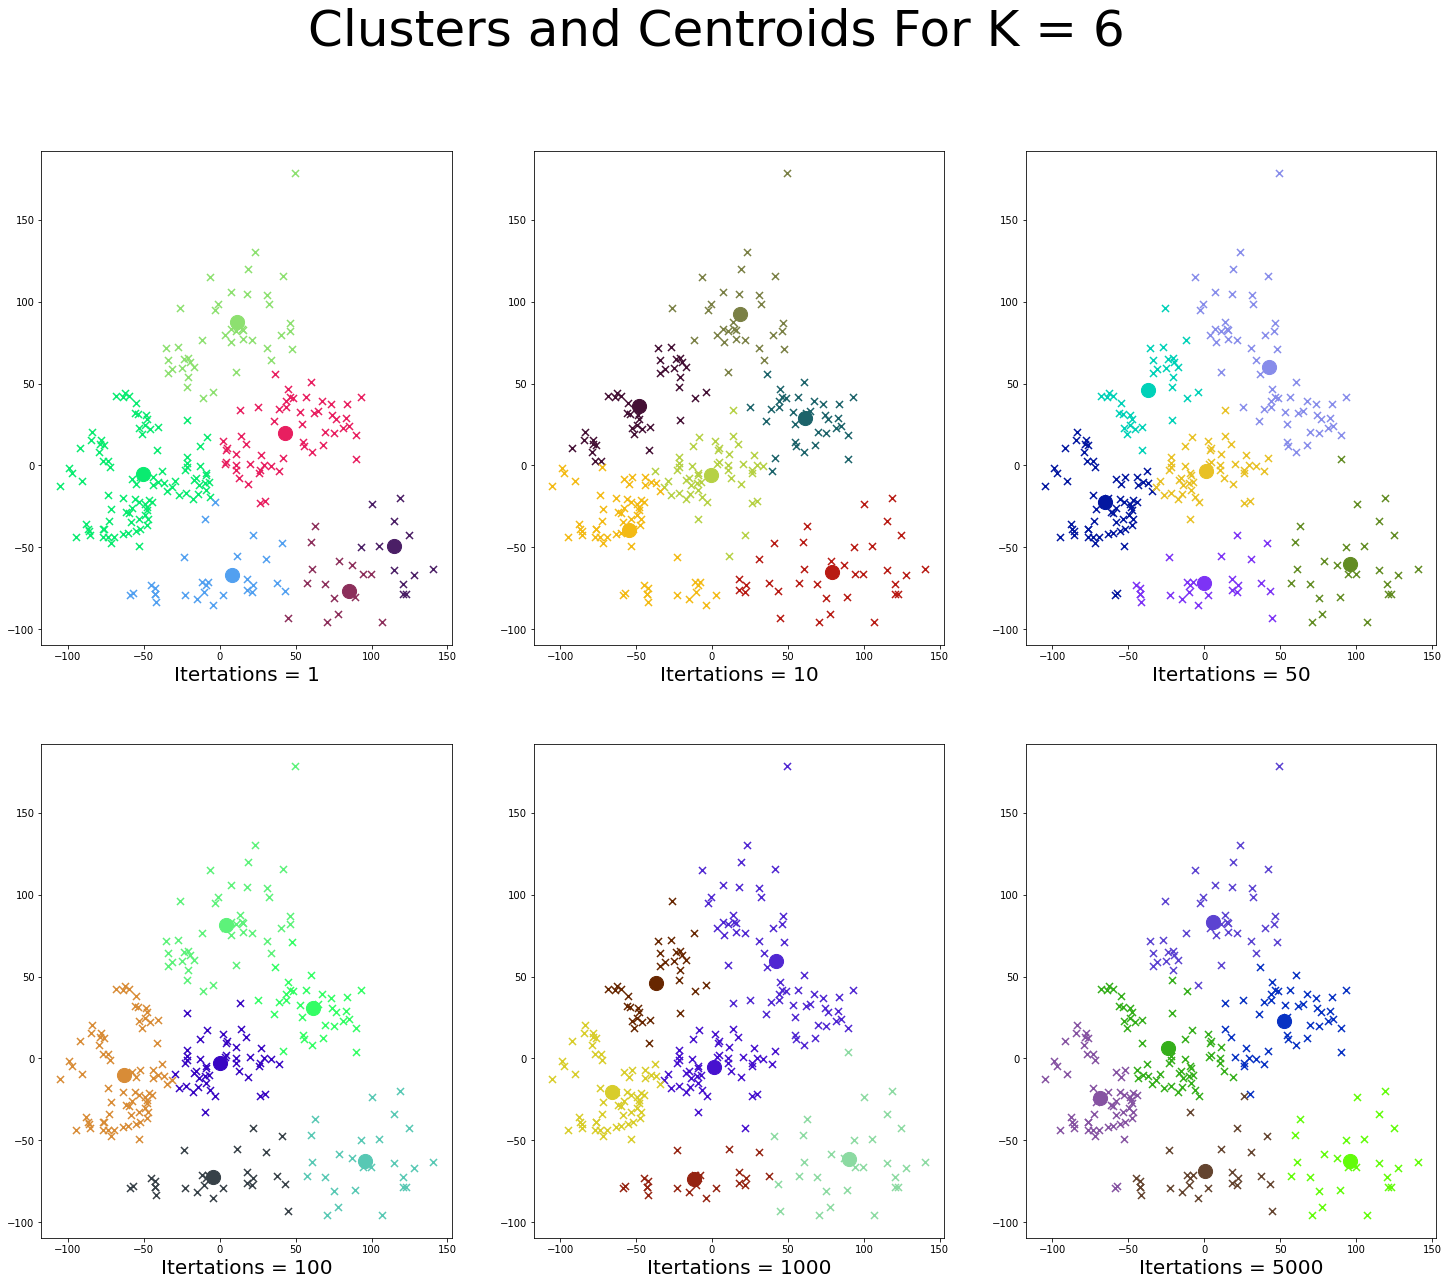

In [25]:
features_matrix = bm_df.to_numpy()
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 6
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50) 
    
print("\n")
print("After 5000 Iterations, Cluster Labels for Data: \n",cluster_labels)
print("\n")